# entraînement de SBERT

### 🏁 1. Chargement des données et prétraitement de base

In [12]:


import pandas as pd

# Charger le dataset
df = pd.read_csv("labeled_data.csv")

In [13]:

# Afficher les premières lignes
df.head()


,offer_text,cv_text,score
0,"Title: Kubernetes Engineer, Senior - Remote\n ...",Résumé: Areas of expertise â¢ Big Data Ecosys...,0.23
1,Title: Senior Principal Azure Cloud Engineer\n...,Résumé: â Willingness to accept the challeng...,0.15
2,Title: DevOps Engineer (RHEL)\n Company...,Résumé: CORE COMPETENCIES ~ Ant ~ Maven ~ GIT ...,0.42
3,Title: Site Reliability Engineer - REST API\n ...,"Résumé: IT SKILLS Languages: C (Basic), JAVA (...",0.42
4,"Title: Lead Back End Engineer (Java, Spring, G...",Résumé: Education Details \n\n B.C.A Bachelor ...,0.23


###   Nettoyage de base 


In [14]:
# Supprimer les lignes avec des valeurs nulles
print(f"\nAvant suppression des NaN: {df.shape}")
df = df.dropna()
print(f"Après suppression des NaN: {df.shape}")

# Supprimer les lignes dupliquées
print(f"\nAvant suppression des doublons: {df.shape}")
df = df.drop_duplicates()
print(f"Après suppression des doublons: {df.shape}")



Avant suppression des NaN: (403, 3)
Après suppression des NaN: (401, 3)

Avant suppression des doublons: (401, 3)
Après suppression des doublons: (395, 3)


In [15]:
# Réinitialiser les index
df = df.reset_index(drop=True)

# Vérification finale
print("\n✅ Nettoyage terminé.")
df.head()


✅ Nettoyage terminé.


,offer_text,cv_text,score
0,"Title: Kubernetes Engineer, Senior - Remote\n ...",Résumé: Areas of expertise â¢ Big Data Ecosys...,0.23
1,Title: Senior Principal Azure Cloud Engineer\n...,Résumé: â Willingness to accept the challeng...,0.15
2,Title: DevOps Engineer (RHEL)\n Company...,Résumé: CORE COMPETENCIES ~ Ant ~ Maven ~ GIT ...,0.42
3,Title: Site Reliability Engineer - REST API\n ...,"Résumé: IT SKILLS Languages: C (Basic), JAVA (...",0.42
4,"Title: Lead Back End Engineer (Java, Spring, G...",Résumé: Education Details \n\n B.C.A Bachelor ...,0.23


###   2. Petite EDA sur les scores

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


 Statistiques sur les scores:
count    395.000000
mean       0.266506
std        0.151597
min        0.020000
25%        0.120000
50%        0.230000
75%        0.420000
max        0.720000
Name: score, dtype: float64


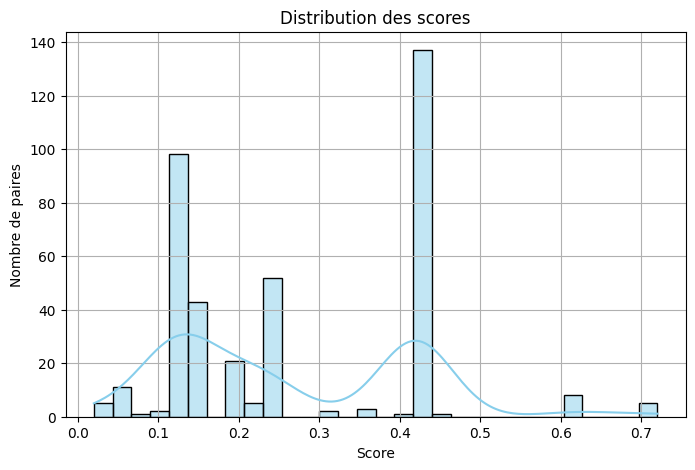

In [17]:
# Statistiques descriptives
print("\n Statistiques sur les scores:")
print(df['score'].describe())

# Distribution des scores
plt.figure(figsize=(8,5))
sns.histplot(df['score'], bins=30, kde=True, color='skyblue')
plt.title('Distribution des scores')
plt.xlabel('Score')
plt.ylabel('Nombre de paires')
plt.grid(True)
plt.show()

In [18]:
# Ajouter 0.1 à tous les scores
df['score'] = df['score'] + 0.1

In [19]:
df.head()

,offer_text,cv_text,score
0,"Title: Kubernetes Engineer, Senior - Remote\n ...",Résumé: Areas of expertise â¢ Big Data Ecosys...,0.33
1,Title: Senior Principal Azure Cloud Engineer\n...,Résumé: â Willingness to accept the challeng...,0.25
2,Title: DevOps Engineer (RHEL)\n Company...,Résumé: CORE COMPETENCIES ~ Ant ~ Maven ~ GIT ...,0.52
3,Title: Site Reliability Engineer - REST API\n ...,"Résumé: IT SKILLS Languages: C (Basic), JAVA (...",0.52
4,"Title: Lead Back End Engineer (Java, Spring, G...",Résumé: Education Details \n\n B.C.A Bachelor ...,0.33


### Prétraitement des Textes

In [20]:
import re

def preprocess(text):
    # Mettre tout en minuscule
    text = text.lower()
    
    # Remplacer les retours à la ligne par un espace
    text = text.replace('\n', ' ').replace('\r', ' ')
    
    # Supprimer les caractères spéciaux (garder lettres, chiffres, ponctuations simples)
    text = re.sub(r'[^a-z0-9\s.,;!?]', ' ', text)
    
    # Supprimer les espaces multiples
    text = re.sub(r'\s+', ' ', text)
    
    # Supprimer les espaces au début et à la fin
    text = text.strip()
    
    return text


In [22]:
df['offer_text'] = df['offer_text'].apply(preprocess)
df['cv_text'] = df['cv_text'].apply(preprocess)


'r sum areas of expertise big data ecosystems hadoop hdfs, mapreduce, hive, pig, sqoop, hbase oozie, spark, pyspark, hue and having knowledge on cassandra programming languages python, core java and have an idea on scala databases oracle 10g, mysql, sqlserver nosql hbase, cassandra tools eclipse, toad, ftp, tectia, putty, autosys, anaconda, jupyter notebool and devops rtc, rlm. scripting languages jsp platforms windows, unixeducation details m.tech it dbs b.tech cse srm university software engineer software engineer larsen and toubro skill details company details company larsen and toubro description worked as a software engineer in technosoft corporation, chennai from aug 2015 to sep 2016. company current project description duration september 2016 to till date vendor citi bank description citibank s citi anti money laundering aml transaction monitoring tm program is a future state solution and a rules based system for transaction monitoring of icg markets business. roles and respones